--- Average Populations for CHARMM27 ---
  State C: 0.1817
  State E: 0.1602
  State NC: 0.3428
  State N: 0.3154
--- Average Populations for CHARMM36m ---
  State C: 0.0582
  State E: 0.8216
  State NC: 0.0039
  State N: 0.1163


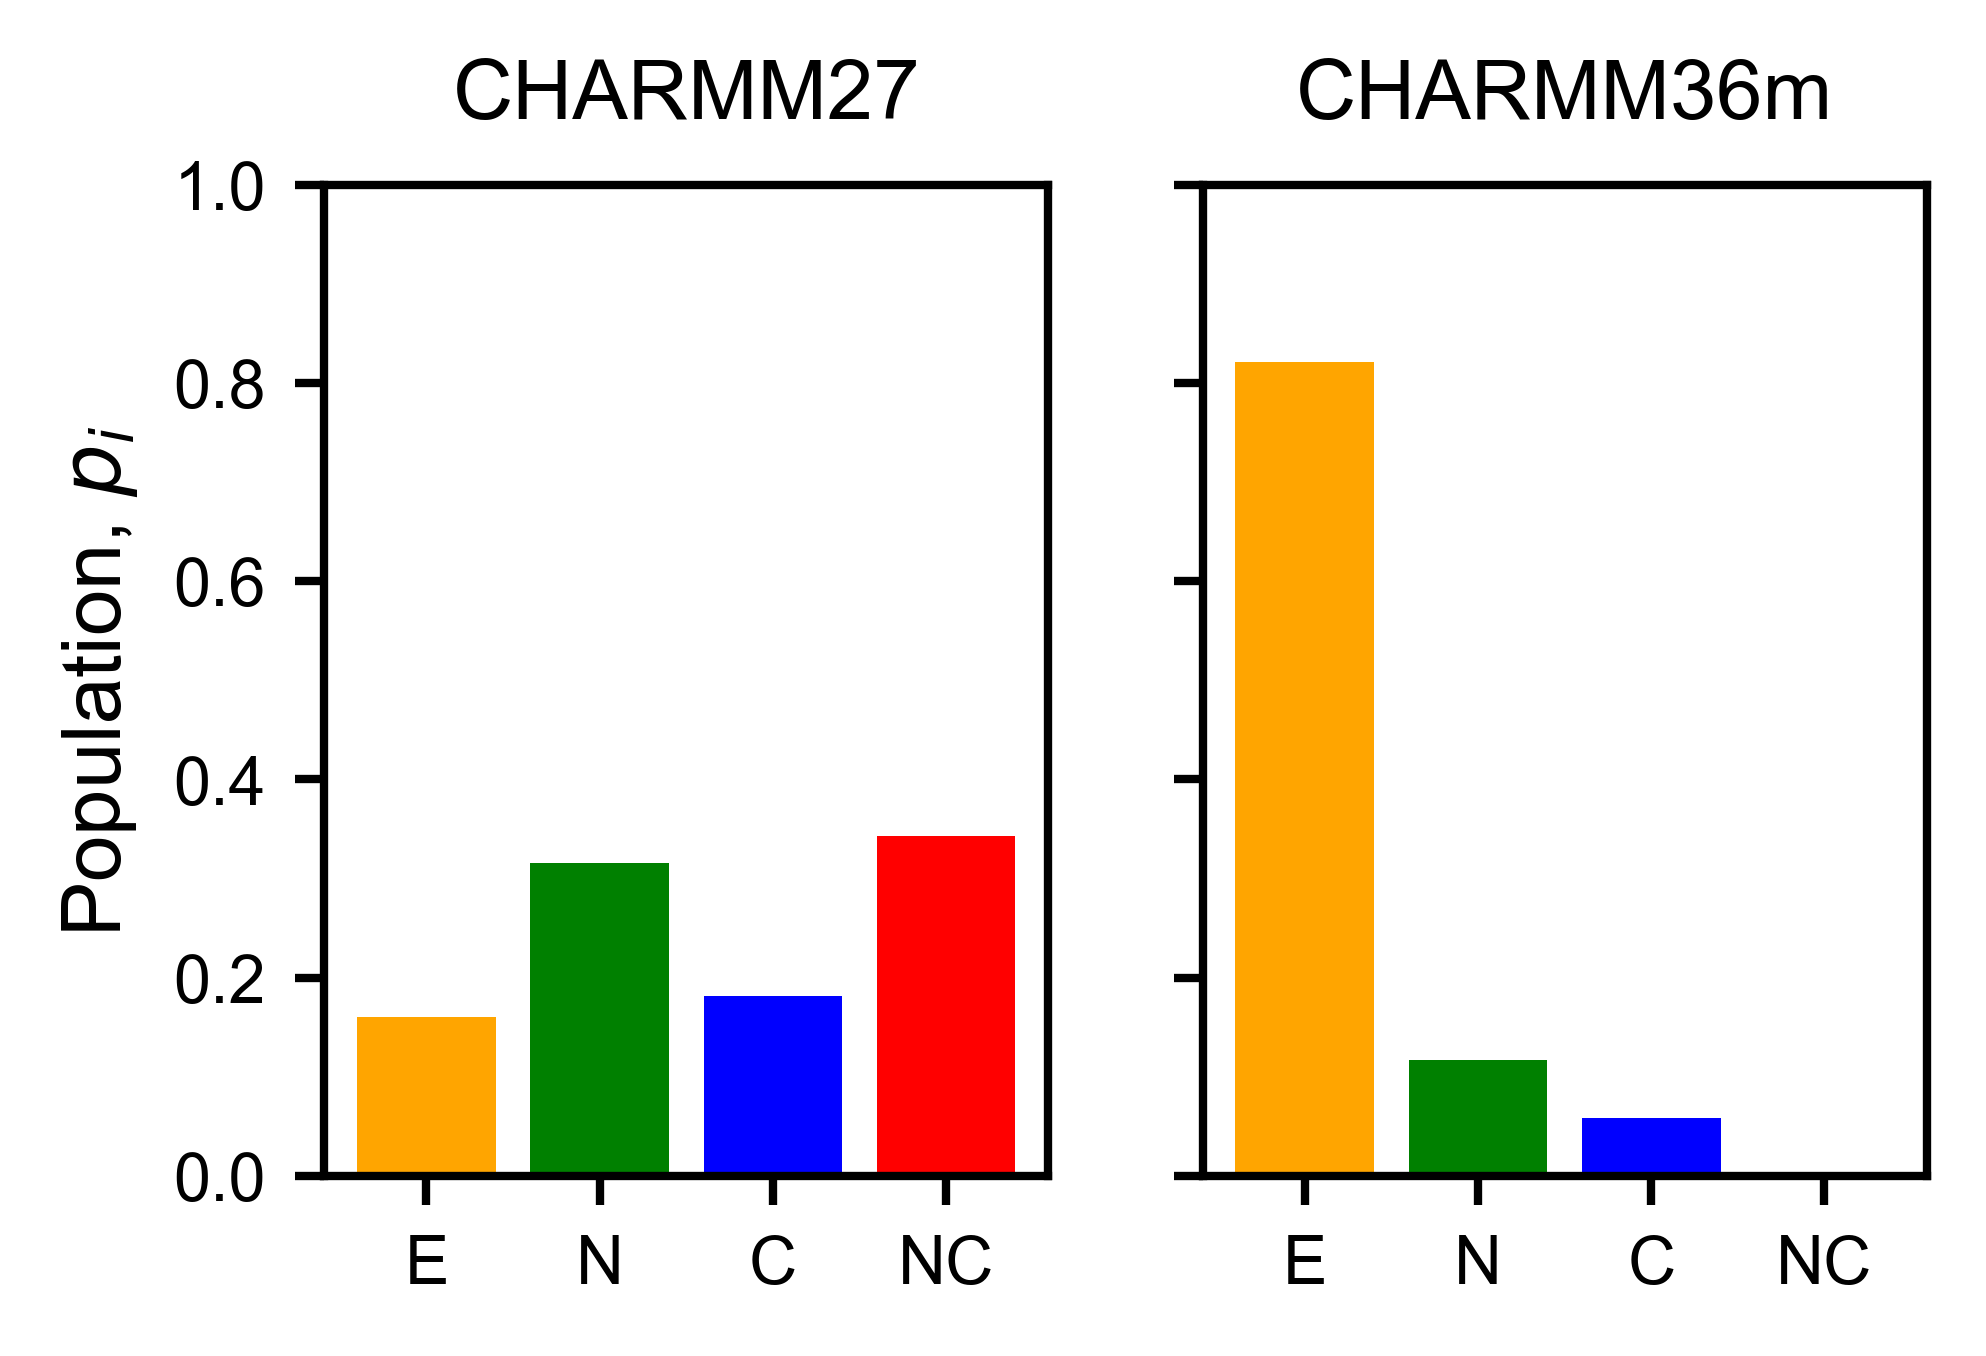

In [1]:
### PLOTS PRIOR 4-STATE POPULATIONS FOR BOTH FFs FOR FIG 4 IN MAIN TEXT ###
### 1 Aug 2025 ###

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------------------------------------------------------------
# CONFIGURATION
# -----------------------------------------------------------------------------

# Paths
BASE_DIR = Path('../data')
PROP_DIR = BASE_DIR / 'prop_array'

# Data Specifications
FORCE_FIELDS = ['CHARMM27_TIP3P', 'CHARMM36m_TIP3P']
FORCE_FIELD_LABELS = {
    'CHARMM27_TIP3P': 'CHARMM27',
    'CHARMM36m_TIP3P': 'CHARMM36m'
}

# State definitions
STATE_KEYS = ['C', 'E', 'NC', 'N']  # Order in data files
STATE_PLOT_ORDER = ['E', 'N', 'C', 'NC']  # Order for plotting
STATE_COLORS = {'E': 'orange', 'N': 'green', 'C': 'blue', 'NC': 'red'}

# Plotting Specifications
FIGURE_SIZE = (3.25, 2.2)
DPI = 600

# -----------------------------------------------------------------------------
# DATA LOADING
# -----------------------------------------------------------------------------

def load_proportions(force_field):
    """Load state proportions array for given force field."""
    filepath = PROP_DIR / force_field / f'proportions_array_0100ps_{force_field}_PAPER.npy'
    if not filepath.exists():
        raise FileNotFoundError(f"Proportions file not found: {filepath}")
    return np.load(filepath)

# -----------------------------------------------------------------------------
# ANALYSIS
# -----------------------------------------------------------------------------

def compute_average_populations(proportions, original_order, plot_order):
    """Compute average populations and reorder for plotting."""
    average_populations = np.mean(proportions, axis=0)
    # Reorder for plotting
    indices = [original_order.index(state) for state in plot_order]
    return average_populations[indices]

# -----------------------------------------------------------------------------
# PLOTTING
# -----------------------------------------------------------------------------

def set_plot_style():
    """Set consistent plot style for ACS publication figures."""
    plt.rcParams.update({
        # Font settings - Arial (PC) or Helvetica (Mac) as per ACS
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'Helvetica'],
        'font.size': 10,  # Will be readable at 5pt when reduced to column width
        
        # Line widths - minimum 1 pt as per ACS
        'lines.linewidth': 1.0,
        'axes.linewidth': 1.0,
        'xtick.major.width': 1.0,
        'ytick.major.width': 1.0,
        'xtick.minor.width': 1.0,
        'ytick.minor.width': 1.0,
        'patch.linewidth': 1.0,
        'grid.linewidth': 1.0,
        
        # Font sizes - accounting for reduction
        'axes.labelsize': 11,
        'axes.titlesize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        
        # DPI settings
        'figure.dpi': 600
    })


def plot_populations(ax, populations, title):
    """Plot state populations as bar chart."""
    x_positions = np.arange(len(STATE_PLOT_ORDER))
    colors = [STATE_COLORS[state] for state in STATE_PLOT_ORDER]
    
    ax.bar(x_positions, populations, color=colors)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(STATE_PLOT_ORDER)
    ax.set_title(title, fontsize=10, pad=8)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='both', which='major', labelsize=8)

# -----------------------------------------------------------------------------
# MAIN
# -----------------------------------------------------------------------------

def main():
    """Main function to generate the plot."""
    set_plot_style()
    
    # Process data for each FF
    plot_data = {}
    for force_field in FORCE_FIELDS:
        proportions = load_proportions(force_field)
        average_populations = compute_average_populations(proportions, STATE_KEYS, STATE_PLOT_ORDER)
        plot_data[force_field] = average_populations
        
        # Print summary
        print(f"--- Average Populations for {FORCE_FIELD_LABELS[force_field]} ---")
        for state, population in zip(STATE_KEYS, np.mean(proportions, axis=0)):
            print(f"  State {state}: {population:.4f}")

    # Create figure
    ncols = len(FORCE_FIELDS)
    fig, axes = plt.subplots(1, ncols, figsize=FIGURE_SIZE, sharey=True)
    if ncols == 1:
        axes = [axes]
    
    # Plot each FF
    for idx, force_field in enumerate(FORCE_FIELDS):
        plot_populations(axes[idx], plot_data[force_field], FORCE_FIELD_LABELS[force_field])
    
    # Add y-label to leftmost plot
    axes[0].set_ylabel('Population, $p_i$', fontsize=10)
    
    plt.tight_layout(pad=0.5, w_pad=1.5)
    plt.show()

if __name__ == "__main__":
    main()